In [1]:
pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 KB 22.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894088 sha256=be7456f4bafe7f31bd4d04d647780729fae09d44c7fd66cb64fc491778e2990d
  Stored in directory: /root/.cache/pip/wheels/2c/04/80/7eefb1a2de7d36aefd06432fab2a1486caf0a0596a7067391a
Successfully built scikit-fuzzy


6.8253253968254235


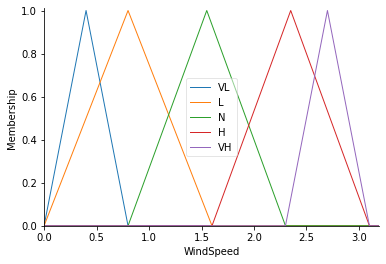

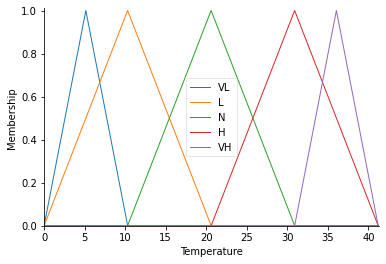

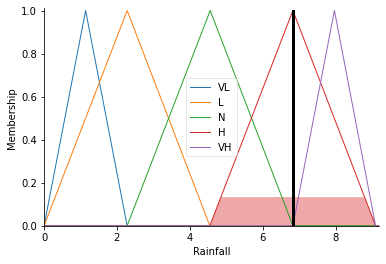

In [5]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random

ws = ctrl.Antecedent(np.arange(0,3.2,0.01),'WindSpeed')
tp = ctrl.Antecedent(np.arange(0,41.3,0.01),'Temperature')
rf = ctrl.Consequent(np.arange(0,9.2,0.01),'Rainfall')

ws['VL']=fuzz.trimf(ws.universe,[0,0.4,0.8])
ws['L']=fuzz.trimf(ws.universe,[0,0.8,1.6])
ws['N']=fuzz.trimf(ws.universe,[0.8,1.55,2.3])
ws['H']=fuzz.trimf(ws.universe,[1.6,2.35,3.1])
ws['VH']=fuzz.trimf(ws.universe,[2.3,2.7,3.1])
ws.view()

tp['VL']=fuzz.trimf(tp.universe,[0,5.15,10.3])
tp['L']=fuzz.trimf(tp.universe,[0,10.3,20.6])
tp['N']=fuzz.trimf(tp.universe,[10.3,20.6,30.9])
tp['H']=fuzz.trimf(tp.universe,[20.6,30.9,41.2])
tp['VH']=fuzz.trimf(tp.universe,[30.9,36.05,41.2])
tp.view()

rf['VL']=fuzz.trimf(rf.universe,[0,1.14,2.28])
rf['L']=fuzz.trimf(rf.universe,[0,2.28,4.55])
rf['N']=fuzz.trimf(rf.universe,[2.28,4.56,6.83])
rf['H']=fuzz.trimf(rf.universe,[4.55,6.83,9.1])
rf['VH']=fuzz.trimf(rf.universe,[6.83,7.97,9.1])

rule1=ctrl.Rule((ws['VL']|ws['L'])&(tp['VL']|tp['L']),rf['VL'])
rule2=ctrl.Rule(ws['VH']&tp['VH'],rf['VH'])
rule3=ctrl.Rule((ws['N']|ws['L'])&(tp['N']|tp['L']),rf['L'])
rule4=ctrl.Rule((ws['N']|ws['H'])&(tp['N']|tp['H']),rf['H'])
rule5=ctrl.Rule(ws['N']&tp['N'],rf['N'])

computing_ctrl = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
computing = ctrl.ControlSystemSimulation(computing_ctrl)
computing.input['WindSpeed'] = (random.randint(0,32))/10
computing.input['Temperature'] = (random.randint(0,413))/10
computing.compute()
print(computing.output['Rainfall'])
rf.view(sim=computing)